## Final Project Submission

Please fill out:
* Student name: Mercy Cherotich
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Veronica Isiaho
* Blog post URL:


# Microsoft Movie Analysis

# Overview.

The project is aimed at understanding the movie industry,identify the gaps and give recommendations to Microsoft on comeback to its rightful position as the leading movie entertainment provider.We use exploratory data analysis which will provide Microsoft with the types of films that are performing well at the box office.The data set used is compiled from https://www.imdb.com/

Data Understanding


To access the data and perform subsequent analysis, we need to import the required libraries,clean the data, and transform data into a suitable format further analysis and give insights.


In [1]:
#Import all libraries required: numpy, pandas, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import all datasets to be used
title_basics=pd.read_csv("C:/Users/user/Documents/Flatiron/project/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz")
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
title_ratings=pd.read_csv("C:/Users/user/Documents/Flatiron/project/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz")
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
movie_gross=pd.read_csv("C:/Users/user/Documents/Flatiron/project/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
#understanding each column from each data set
title_basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [6]:
title_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [7]:
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [8]:
#merge the datasets title_basic and title_ratings as title_basic_rating
title_basics_ratings = pd.merge(title_basics, title_ratings)
title_basics_ratings.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [9]:
#merging title_basic_rating with movie_gross as df
df=pd.merge(title_basics_ratings,movie_gross,left_on='primary_title', right_on='title')
df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [10]:
# To display the first five rows of our dataset
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


# Data Cleaning
To transform the dataset usable function, data cleaning process is as follows:

 1.Dropping unnecessary columns. 
 
2.Identifying and dropping duplicates. 

3.Handling missing values. 

4.Iterating over columns and making necessary adjustments.


In [11]:
#dropping unnecessary columns in the merged dataset
df= df.drop(['tconst', 'primary_title','original_title', 'start_year','studio'], axis=1)
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,NaN,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000,2012
2,89.0,Drama,6.0,6,On the Road,744000.0,8000000,2012
3,121.0,Drama,5.7,127,On the Road,744000.0,8000000,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,NaN,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,NaN,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,NaN,2018


In [12]:
#checking for duplicates
df.duplicated().value_counts()

False    3027
dtype: int64

In [13]:
#keep all duplicates and sort by title
df[df.duplicated(keep=False)].sort_values(by='title')
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,NaN,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000,2012
2,89.0,Drama,6.0,6,On the Road,744000.0,8000000,2012
3,121.0,Drama,5.7,127,On the Road,744000.0,8000000,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,NaN,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,NaN,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,NaN,2018


In [14]:
#dropping title duplicates and keep the first one
df = df.drop_duplicates(subset=['title'], keep='first')
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,NaN,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,NaN,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,NaN,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,NaN,2018


In [15]:
#missing data 
df.isna().sum()

runtime_minutes      14
genres                1
averagerating         0
numvotes              0
title                 0
domestic_gross       17
foreign_gross      1040
year                  0
dtype: int64

In [16]:
df.dtypes

runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

From the above above codes,foreign gross has the highest number of missing value.The missing foreign and domestic gross values will be replaced by the most frequent value while the misiing runtime minutes will be replaced by the mean.

In [18]:
#remove the comma from the string(foreign gross) and then convert it to a float
df['foreign_gross'] = df['foreign_gross'].astype(str).str.replace(',', '', regex=True).astype(float)
df

<ipython-input-18-75a87d88330b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].astype(str).str.replace(',', '', regex=True).astype(float)


,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,NaN,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,NaN,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,NaN,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,NaN,2018


In [19]:
#change the datatype to float
df['foreign_gross'] = df['foreign_gross'].astype(float)
df

<ipython-input-19-fdfe8524977e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].astype(float)


,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,NaN,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,NaN,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,NaN,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,NaN,2018


In [20]:
#replace missing values in the foreign_gross column with the most common value from that column.
df['foreign_gross'].fillna(df['foreign_gross'].mode()[0], inplace=True)
df

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,1200000.0,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,1200000.0,2018


In [21]:
#replace missing values in the domestic_gross column with the most common value from that column.
df['domestic_gross'].fillna(df['domestic_gross'].mode()[0], inplace=True)
df

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,1200000.0,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,1200000.0,2018


In [22]:
#replace missing values in the runtime_minutes column with the mean.
df['runtime_minutes'].fillna(df['runtime_minutes'].mean(), inplace=True)
df

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,1200000.0,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,1200000.0,2018


In [23]:
# Fill missing data with the most frequent value from genres
df['genres'].fillna(df['genres'].value_counts().index[0], inplace=True)
df

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,1200000.0,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,1200000.0,2018


In [24]:
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,1200000.0,2016
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015
...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,1200000.0,2018


Now that our dataset is fully cleaned and prepared for analysis, we can now use it to answer some different questions that will yield valuable insights for Microsoft.


# Average analysis of gross earnings from year 2010 to 2018
Getting the average of both foreign and domestic gross earning will provide insight on the performance of the movie industry over period.

In [26]:
#add a column average gross
df['Average_gross'] = df[['domestic_gross', 'foreign_gross']].mean(axis=1)

<ipython-input-26-d1f5f08f919e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average_gross'] = df[['domestic_gross', 'foreign_gross']].mean(axis=1)


In [27]:
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year,Average_gross
0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,1100000.0,1200000.0,2016,1150000.0
1,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,744000.0,8000000.0,2012,4372000.0
4,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,94050000.0
5,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014,26600000.0
6,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,652300000.0,1019.4,2015,326150509.7
...,...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015,600150.0
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018,41423500.0
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018,636000.0
3025,114.0,"Drama,Romance",6.4,322,Last Letter,181000.0,1200000.0,2018,690500.0


In [28]:
#slices the data to include values between 2010 and 2018,group by year
df1= df[(df['year'] <= 2018) & (df['year'] >= 2010)]  
df1= df1.groupby('year')['Average_gross'].mean().reset_index()
df1

,year,Average_gross
0,2010,4.846024e+07
1,2011,3.537233e+07
2,2012,3.432254e+07
3,2013,4.397963e+07
4,2014,3.728497e+07
5,2015,3.159594e+07
6,2016,3.675562e+07
7,2017,5.067393e+07
8,2018,5.060068e+07


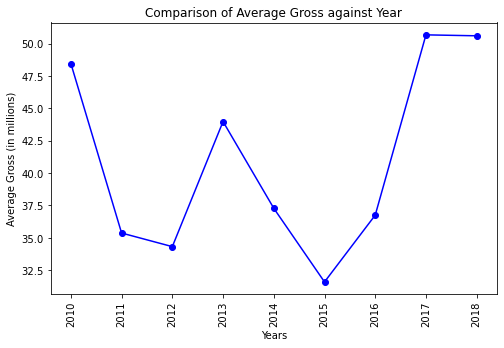

In [29]:
# Extract x and y values to plot,
# Drawing a line graph of average revenue against year
x_values = df1['year']
y_values = df1['Average_gross']/ 1000000
xlabs = 'Years'
ylabs = 'Average Gross (in millions)'
title = 'Comparison of Average Gross against Year'

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o', color='blue')
plt.xticks(ticks=x_values, rotation=90)
plt.xlabel(xlabs)
plt.ylabel(ylabs)
plt.title(title)
plt.show()

The average domestic and foreign gross showed an increasing trend from the years 2015 to 2017.In the year 2018, the average domestic and foreign gross appeared to be constant, showing no significant increase or decrease.Based on these findings, it suggests that there may be an opportunity to venture into creating movies because the average gross remained stable and there is a positive trend in the preceding years (2015 to 2017). 

# Genre count
What Movie Genres can be recommended for Microsoft to produce?

In [30]:
df['genres']

0            Action,Crime,Drama
1       Adventure,Drama,Romance
4        Adventure,Comedy,Drama
5            Action,Crime,Drama
6       Action,Adventure,Sci-Fi
                 ...           
3022                      Drama
3023                    Romance
3024                      Drama
3025              Drama,Romance
3026          Documentary,Music
Name: genres, Length: 2598, dtype: object

In [31]:
#changing the data type
df['genres'].astype('str')

0            Action,Crime,Drama
1       Adventure,Drama,Romance
4        Adventure,Comedy,Drama
5            Action,Crime,Drama
6       Action,Adventure,Sci-Fi
                 ...           
3022                      Drama
3023                    Romance
3024                      Drama
3025              Drama,Romance
3026          Documentary,Music
Name: genres, Length: 2598, dtype: object

In [32]:
#iterate over the genres column to seperate each genre into a row
genre1=[]
for value in df['genres']:
        genre1.append(value.split(','))

genre1

[['Action', 'Crime', 'Drama'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Drama'],
 ['Comedy', 'Drama'],
 ['Crime', 'Drama'],
 ['Comedy', 'Family'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Crime', 'Drama', 'Thriller'],
 ['Action', 'Sci-Fi', 'Thriller'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Biography', 'Drama', 'History'],
 ['Comedy'],
 ['Action', 'Adventure', 'Thriller'],
 ['Horror', 'Mystery', 'Thriller'],
 ['Action', 'Drama', 'Family'],
 ['Drama', 'Romance', 'Sci-Fi'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Comedy', 'Drama', 'Romance'],
 ['Action', 'Comedy', 'Fantasy'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Drama', 'Fantasy'],
 ['Drama'],
 ['Horror', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy

In [33]:
#flattening the list
Genre =[]
for item in genre1:
    for item1 in item:
        Genre.append(item1)
Genre

['Action',
 'Crime',
 'Drama',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Comedy',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Comedy',
 'Family',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Biography',
 'Drama',
 'History',
 'Comedy',
 'Action',
 'Adventure',
 'Thriller',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Drama',
 'Family',
 'Drama',
 'Romance',
 'Sci-Fi',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Comedy',
 'Drama',
 'Romance',
 'Action',
 'Comedy',
 'Fantasy',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Drama',
 'Fantasy',
 'Drama',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Dram

In [34]:
# Identify the count of each of the elements in the container
from collections import Counter
Counter(Genre)

Counter({'Action': 586,
         'Crime': 344,
         'Drama': 1508,
         'Adventure': 411,
         'Romance': 427,
         'Comedy': 853,
         'Sci-Fi': 122,
         'Family': 104,
         'Animation': 148,
         'Thriller': 370,
         'Mystery': 180,
         'Biography': 262,
         'History': 122,
         'Horror': 185,
         'Fantasy': 156,
         'Western': 18,
         'Music': 85,
         'Documentary': 180,
         'War': 46,
         'Sport': 42,
         'Musical': 16,
         'News': 1})

In [35]:
genre_counts = Counter({'Drama': 1508, 'Comedy': 853, 'Action': 586, 'Romance': 427, 'Adventure': 411, 'Thriller': 370, 'Crime': 344, 'Biography': 262, 'Horror': 185, 'Mystery': 180, 'Documentary': 180, 'Fantasy': 156, 'Animation': 148, 'Sci-Fi': 122, 'History': 122, 'Family': 104, 'Music': 85, 'War': 46, 'Sport': 42, 'Western': 18, 'Musical': 16, 'News': 1})


In [36]:
Total_Genre=pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
Total_Genre

,Genre,Count
0,Drama,1508
1,Comedy,853
2,Action,586
3,Romance,427
4,Adventure,411
5,Thriller,370
6,Crime,344
7,Biography,262
8,Horror,185
9,Mystery,180


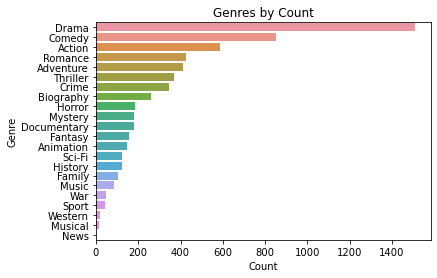

In [37]:
#plotting Genre by Count
sns.barplot(x='Count', y='Genre', data=Total_Genre)
plt.title("Genres by Count")
plt.show()

As shown above the top five movie genres by count based on the dataset are: Drama,comedy,action,romance and adventure.This information can be valuable for purposes of understanding popular genres and making decisions about movie production or distribution.

# Average movie runtime
we need to get the average runtime of the movies provided in the dataset.

In [38]:
#movie runtime_minutes
mean_value = df['runtime_minutes'].mean()
mean_value

108.51122291021673

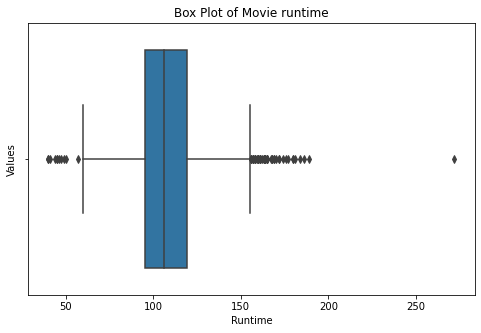

In [39]:
#Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='runtime_minutes', data=df)  
plt.xlabel('Runtime')
plt.ylabel('Values')
plt.title('Box Plot of Movie runtime')

plt.show()


From the dataset the average runtime of a movie is 108 minutes.As show in the box plot above,the majority of movies have runtimes within the 100 to 120-minute range.Microsoft should consider the time ranges above while releasing movies as is aligns with industry standards and audience expectations.

# Best movie genre based on rating and votes
For this analysis, we will consider only the vote(numvote) greater than 1000 and average rating greater than 5.
Some movies that have more than one genre, so we decided to convert all data for movies with more than one genre, to become the string "mix"

In [40]:
df.loc[df['genres'].str.contains(','), 'genres'] = 'mix'

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [41]:
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year,Average_gross
0,103.0,mix,7.1,15378,Wazir,1100000.0,1200000.0,2016,1150000.0
1,124.0,mix,6.1,37886,On the Road,744000.0,8000000.0,2012,4372000.0
4,114.0,mix,7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,94050000.0
5,114.0,mix,6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014,26600000.0
6,124.0,mix,7.0,539338,Jurassic World,652300000.0,1019.4,2015,326150509.7
...,...,...,...,...,...,...,...,...,...
3022,102.0,Drama,7.1,147,The Chambermaid,300.0,1200000.0,2015,600150.0
3023,101.0,Romance,6.5,607,How Long Will I Love U,747000.0,82100000.0,2018,41423500.0
3024,135.0,Drama,5.4,673,Helicopter Eela,72000.0,1200000.0,2018,636000.0
3025,114.0,mix,6.4,322,Last Letter,181000.0,1200000.0,2018,690500.0


In [43]:
#dataset up to remove bias
df = df[df['averagerating'] >= 5]
df = df[df['numvotes'] > 1000]
df

,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,year,Average_gross
0,103.0,mix,7.1,15378,Wazir,1100000.0,1200000.0,2016,1150000.0
1,124.0,mix,6.1,37886,On the Road,744000.0,8000000.0,2012,4372000.0
4,114.0,mix,7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,94050000.0
5,114.0,mix,6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014,26600000.0
6,124.0,mix,7.0,539338,Jurassic World,652300000.0,1019.4,2015,326150509.7
...,...,...,...,...,...,...,...,...,...
3018,139.0,mix,8.5,43409,Andhadhun,1200000.0,1200000.0,2018,1200000.0
3019,95.0,mix,6.1,2585,Gonjiam: Haunted Asylum,115000.0,1200000.0,2018,657500.0
3020,126.0,Drama,8.5,20215,Capernaum,1700000.0,1200000.0,2018,1450000.0
3021,137.0,Drama,7.2,1620,The Spy Gone North,501000.0,1200000.0,2018,850500.0


In [44]:
genres_rating = df[['genres', 'averagerating']]
genres_rating

,genres,averagerating
0,mix,7.1
1,mix,6.1
4,mix,7.3
5,mix,6.5
6,mix,7.0
...,...,...
3018,mix,8.5
3019,mix,6.1
3020,Drama,8.5
3021,Drama,7.2


In [45]:
genres_votes = df[['genres', 'numvotes']]
genres_votes

,genres,numvotes
0,mix,15378
1,mix,37886
4,mix,275300
5,mix,105116
6,mix,539338
...,...,...
3018,mix,43409
3019,mix,2585
3020,Drama,20215
3021,Drama,1620


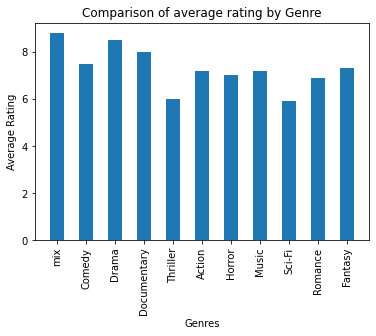

In [46]:
#compare average rating with genre

plt.bar(x = df['genres'], height = df['averagerating'], width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Comparison of average rating by Genre')
plt.show()

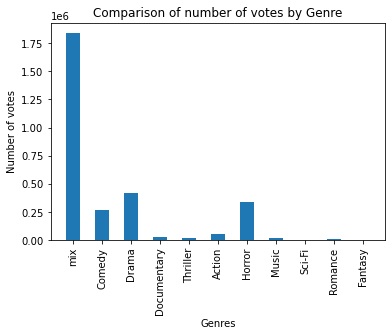

In [47]:
#compare number of votes with genre

plt.bar(x = df['genres'], height = df['numvotes'], width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of votes')
plt.title('Comparison of number of votes by Genre')
plt.show()

From the above comparison of genre with average rating and number of vote, most audience would prefer a movie that has more than one genre.It is important to note that based on the rating there is insignificant difference in the genre hence important to have a movie has a mixed genre.This aligns with the idea that the combination of genres can enhance a movie's appeal and attract a larger viewership.

# Conclusion

Microsoft should consider creating films as income from the venture exhibit increasing and stable income over the years.In-depth market research to understand audience preferences and genre trends should be done to identify areas of opportunity and potential niches.

Whilst we can generalize that drama seems to be the most popular genre produced, there are many other factors which can contribute to the preference of a viewer.Microsoft might want tp blend different genres as it broader appeal and attract a larger audience. Mixing genres can provide a diverse and engaging cinematic experience.

Microsoft should take into consideration the runtime of a movie.The runtime of a movie can significantly impact the viewing experience and the concentration of the audience.
